# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования
Выполнили студенты гр. 9304 Цаплин Илья и Силкин Владислав. Вариант №11

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). 

## Основные теоретические положения

**Дискретный сигнал:** $x_0, x_1, x_2, ..., x_{N-1}$, как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $s(t)$ 

Будем считать, что $x_k, k = 0,1,2,3, ..., N-1$, отсчёты дискретного
сигнала, получены в результате дискретизации сигнала $s(t)$ с шагом дискретизации, равным единице: $x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если на самом деле $t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1 $
то вводим в рассмотрение $\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате получим: $\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

**Дискретное преобразование Фурье:** Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: $X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$, или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \frac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

**Передаточные функции:**

Для линейного преобразования по 5 точкам:
$$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$$
по 9 точкам:
$$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$$
Для численного дифференцирования:
$$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2}$$
Для численного интегрирования по формуле прямоугольников:
$$H(\omega) = \frac{1}{\cos(\omega) + i\sin(\omega) - 1}$$
Для численного интегрирования по формуле трапеций:
$$H(\omega) = \frac{\cos(\omega) + 2}{3i\sin(\omega)}$$
Для численного интегрирования по формуле Симпсона:
$$H(\omega) = \frac{3\cos^3(\omega/2)}{2i\sin(3\omega/2)}$$

**Формулы:**

Для линейного сглаживания по 5 точкам:
$$y_{5}(n) = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$$
по 9 точкам:
$$y_{9}(n) = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$$
Для численного дифференцирования:
$$y_n = \frac{x_{n+1} - x_{n-1}}{2}$$
Рекурсивная формула для метода правых прямоугольников:
$$y_{n+1}=y_n+x_{n+1}$$
Рекурсивная формула для метода трапеций:
$$y_{n+1}=y_n+\frac{1}{2}[x_{n+1}+x_n]$$
Рекурсивная формула Симпсона:
$$y_{n+1}=y_{n-1}+\frac{1}{3}[x_{n+1} + 4x_n + 4_{n-1}]$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

1. Сформируем дискретный сигнал с шагом $T = 1$ на основе аналогового сигнала, вида линейной комбинации косинусойд $A_k \cos(\omega_k t + \varphi_k)$, с изменяющимся шагом $\Delta \omega = 0.1\pi$, с коэффициентами $A_k$, случайно сгенерированными целыми числами от 1 до 11, начальная фаза $\varphi_k \in [0;0.5]$, сгенерировано 32 отсчёта ($N=31$).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

N = 32
np.random.seed(11)

# Характеристики сигнала
omegas = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A_coeffs = np.random.randint(1, 11, 11)
phases = np.random.uniform(0, 0.5, 11)
    
# Моделируемый сигнал
def f(x_list):
    y = []
    
    for x in x_list:
        y_value = 0
        for omega, A, phase in zip(omegas, A_coeffs, phases):
            y_value += A * np.cos(omega * x + phase)
        y_value = y_value / np.sum(A_coeffs)
        y.append(y_value)
    return y

x_analog = np.linspace(0, N, 1000)
signal_analog = f(x_analog)
x_discrete = np.linspace(0, N, N)
signal_discrete = f(x_discrete)

2. Визуализируем сгенерированные аналоговый и дискретный сигналы на промежутке $k \in [0;31]$

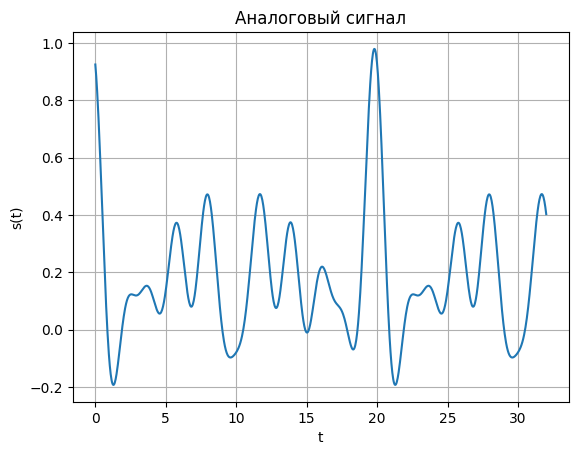

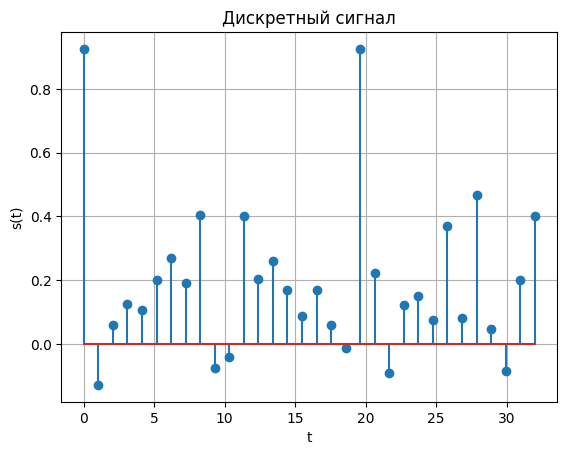

In [2]:
# Функция отрисовки
def show_plot(X, Y, analog=False):
    plt.clf()
    plt.grid()
    if analog:
        plt.plot(X, Y)
    else:
        plt.stem(X, Y)

show_plot(x_analog, signal_analog, analog=True)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Аналоговый сигнал')
plt.show()
show_plot(x_discrete, signal_discrete)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найдем дискретные отсчёты спектра дискретного сигнала и визуализируем их. Сгенерируем и построим половину отсчётов спектра сигнала, ввиду симметричности отсчётов спектра:

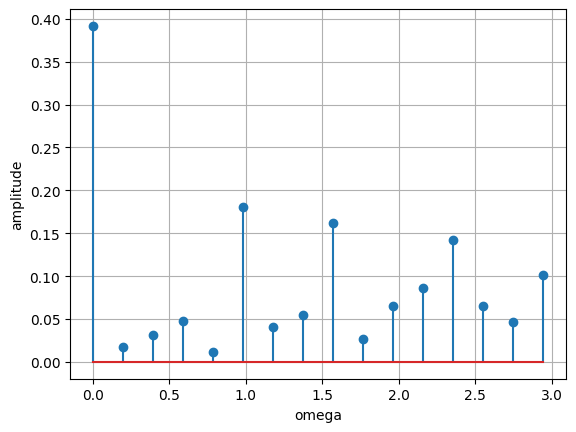

In [3]:
from scipy.fft import fft, fftfreq

def DFT(signal):
    FFT_result = fft(signal)
    frequencies = fftfreq(N, 1)[:N//2]
    omega_frequencies = 2 * np.pi * frequencies
    return omega_frequencies, 2.0 / N * np.abs(FFT_result[0:N//2])

omega_frequencies, amplitudes = DFT(signal_discrete)
plt.stem(omega_frequencies, amplitudes)
plt.xlabel('omega')
plt.ylabel('amplitude')
plt.grid()
plt.show()

4. Создадим функцию для линейного сглаживания

In [4]:
# Линейное сглаживание 
def lin_smooth(y, dots):
    return np.convolve(y, np.ones(dots), 'same') / dots


In [5]:
lin_smooth_5 = lin_smooth(signal_discrete, 5)
lin_smooth_9 = lin_smooth(signal_discrete, 9)

5. Визуализируем полученные линейным сглаживанием по 5 и 9 точкам сигналы

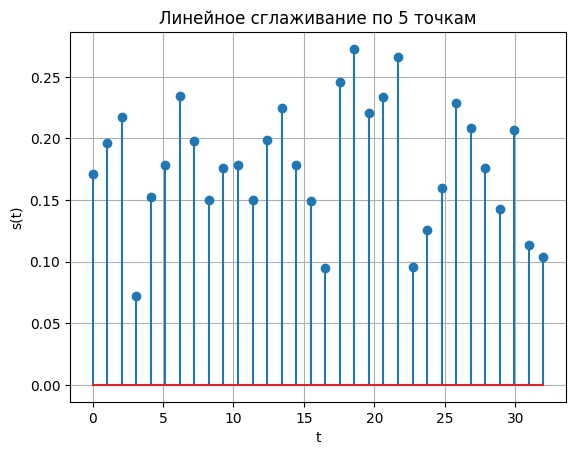

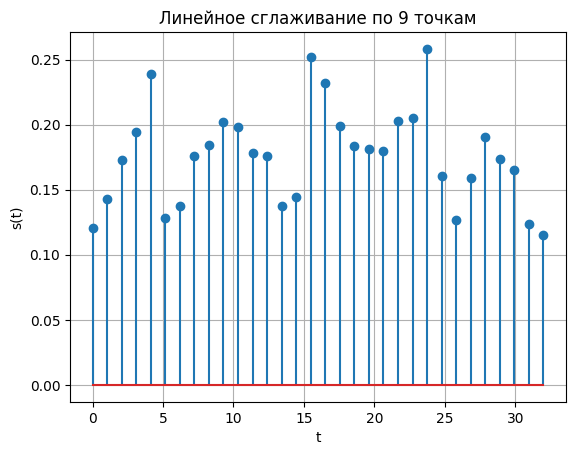

In [6]:
show_plot(x_discrete, lin_smooth_5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Линейное сглаживание по 5 точкам')
plt.show()
show_plot(x_discrete, lin_smooth_9)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Линейное сглаживание по 9 точкам')
plt.show()

6. С помощью ДПФ сгенерируем спектры сглаженной функции по 5 и 9 точкам, возьмём также половину отсчётов

In [7]:
def compare_spectrums(func1, func2, name='func1'):
    def plot_spectrum(ax, func):
        omega_frequencies, amplitudes = DFT(func)
        ax.stem(omega_frequencies, amplitudes)
        ax.set_xlabel('omega')
        ax.set_ylabel('amplitude')
        ax.grid()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plot_spectrum(ax1, func1)
    ax1.set_title(name)
    ax2.set_title('Дискретные отсчёты исходного спектра')
    plot_spectrum(ax2, func2)

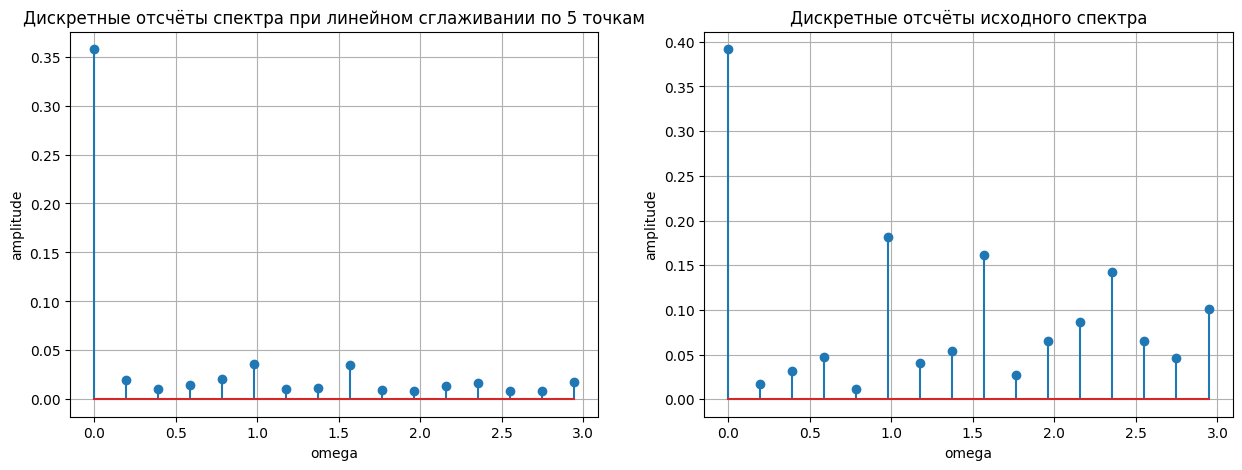

In [8]:
compare_spectrums(lin_smooth_5, signal_discrete, 'Дискретные отсчёты спектра при линейном сглаживании по 5 точкам')
plt.show()

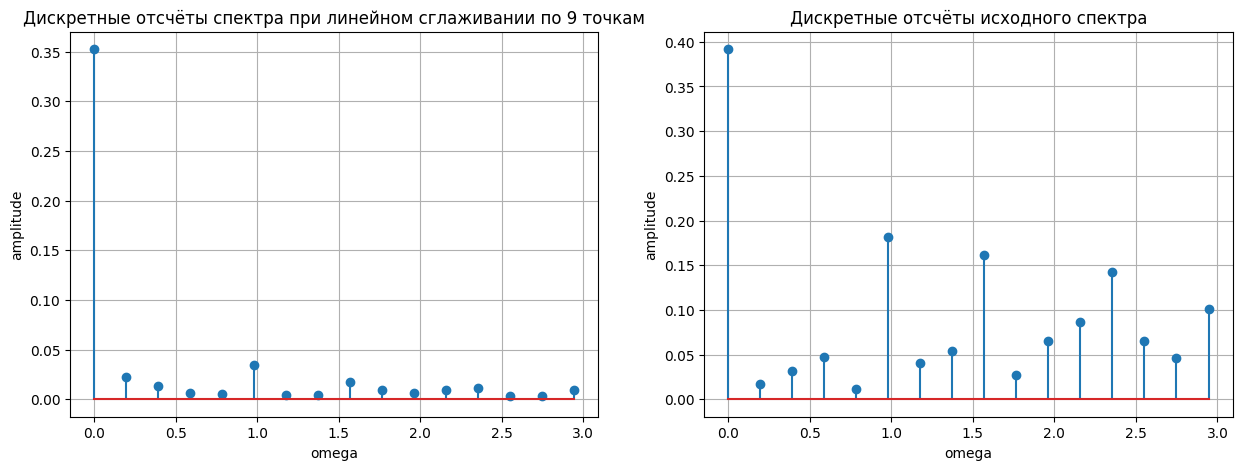

In [9]:
compare_spectrums(lin_smooth_9, signal_discrete, 'Дискретные отсчёты спектра при линейном сглаживании по 9 точкам')

7. Построим $H(\omega)$ - частотную характеристику фильтра для 5 и 9 точек:

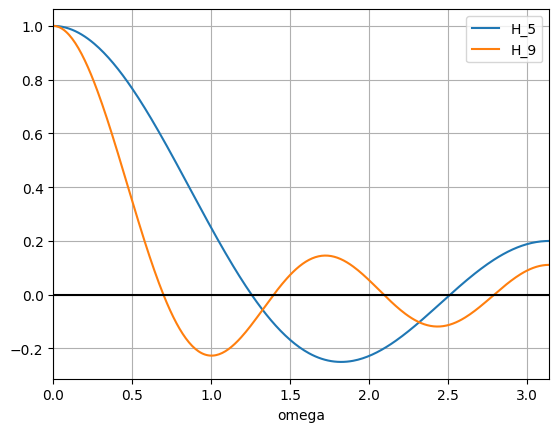

In [10]:
# Построение H(omega)
plt.plot(np.arange(0, np.pi, 0.01), [1/5 * (1 + 2 * np.cos(x) + 2 * np.cos(2*x)) for x in np.arange(0, np.pi, 0.01)], label='H_5')
plt.plot(np.arange(0, np.pi, 0.01), [1/9 * (1 + 2 * np.cos(x) + 2 * np.cos(2*x) + 2 * np.cos(3*x) + 2 * np.cos(4*x)) for x in np.arange(0, np.pi, 0.01)], label='H_9')
def plot_H():
    plt.legend()
    plt.axhline(y=0, color='k')
    plt.xlim((0, np.pi))
    plt.xlabel('omega')
    plt.grid()
    plt.show()
plot_H()

Сравнивая спектры с передаточными функциями, можно заметить, что спектры сопоставимы с модулями передаточных функций. Константный сигнал передаётся без искажения.
Амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала. При этом снижение амплитуды больше при использовании сглаживания по 9 точкам

8. Повторим пункты 4-7 для следующих фильтров:

а. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка

In [11]:
def derivative_H(omega):
    return abs((np.exp(1j * omega) - np.exp(-1j * omega)) / 2)

def derivative(signal):
    return np.convolve(signal, np.array([-1, 0, 1]), 'same') / 2

derivative_signal = derivative(signal_discrete)

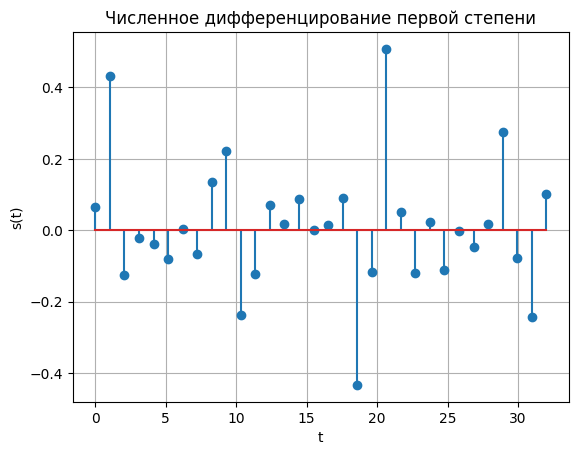

In [12]:
show_plot(x_discrete, derivative_signal)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Численное дифференцирование первой степени')
plt.show()

Построим спектр для значений после применения фильтра, соотвествующего численному дифференцированию первой степени

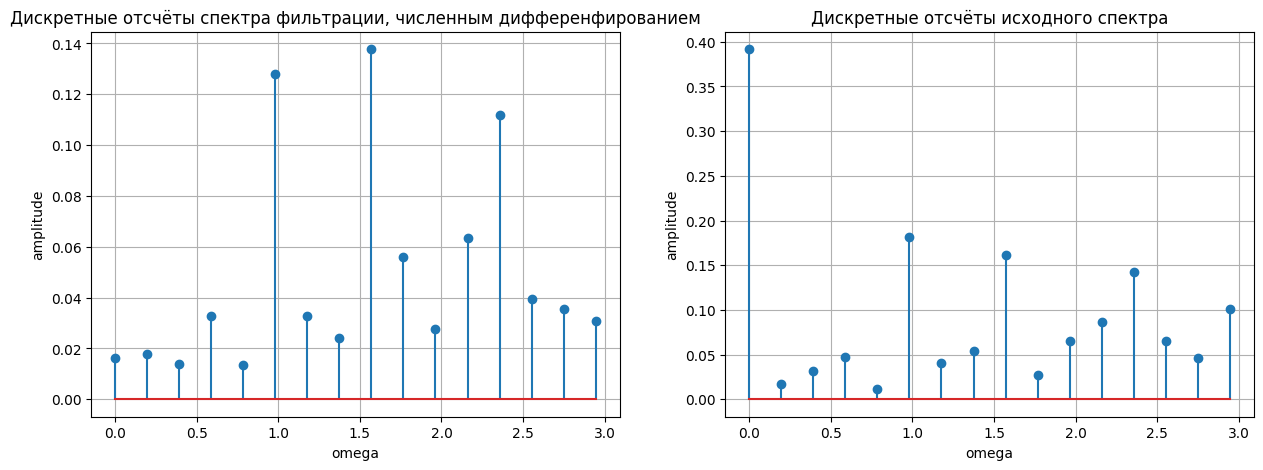

In [13]:
compare_spectrums(derivative_signal, signal_discrete, 'Дискретные отсчёты спектра фильтрации, численным дифференфированием')

Построим $H(\omega)$ для фильтрации при помощи численного дифференцирования 

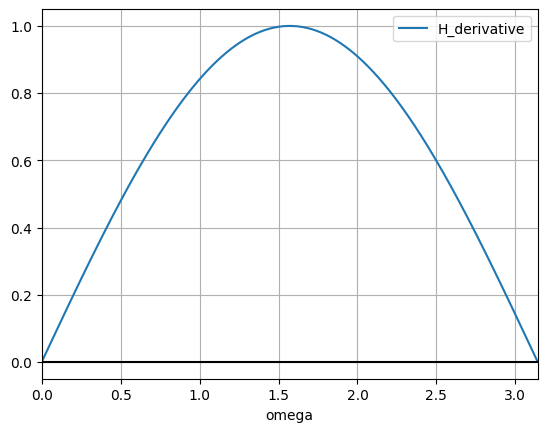

In [14]:
# Построение H(omega)
plt.plot(np.arange(0, np.pi, 0.01), [derivative_H(x) for x in np.arange(0, np.pi, 0.01)], label='H_derivative')
plot_H()

Передаточная функция соответствует спектру, что подтверждается их визуальным сравнением, по графику можно заметить, что средние частоты не приглушены, в отличии от высоких и низких.

b. Дискретные фильтры, соответствующие численному интегрированию (прямоугольников, трапеций, Симпсона).

In [15]:
def integrate_rectangle(signal):
    result = [signal[0]]
    for i in range(1, len(signal)):
        result.append(result[-1] + signal[i])
    return result
        
def integrate_trapezoid(signal):
    result = [signal[0]]
    for i in range(1, len(signal)):
        result.append(result[-1] + (signal[i] + signal[i-1]) / 2)
    return result

def integrate_simpson(signal):
    result = [signal[0], signal[1]]
    for i in range(2, len(signal)):
        result.append(result[i-2] + (signal[i] + 4*signal[i-1] + signal[i-2]) / 3)
    return result

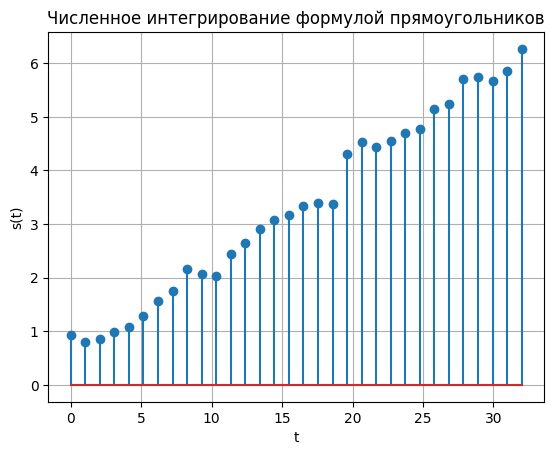

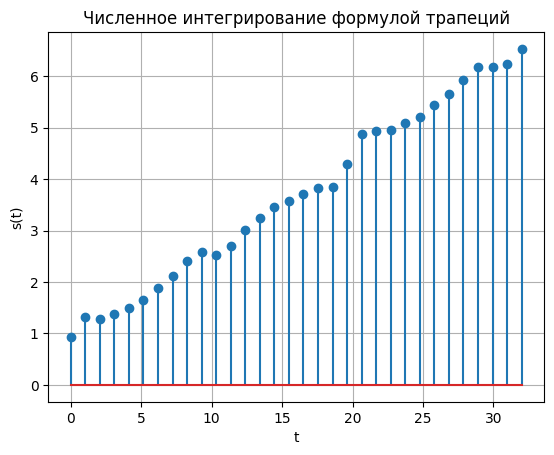

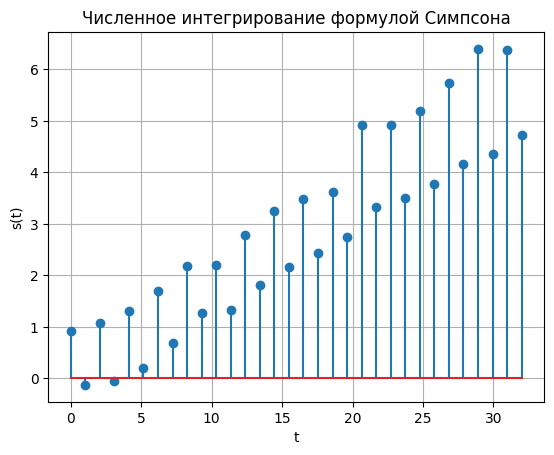

In [16]:
rectangle_signal = integrate_rectangle(signal_discrete)
trapezoid_signal = integrate_trapezoid(signal_discrete)
simpson_signal = integrate_simpson(signal_discrete)

show_plot(x_discrete, rectangle_signal)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Численное интегрирование формулой прямоугольников')
plt.show()
show_plot(x_discrete, trapezoid_signal)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Численное интегрирование формулой трапеций')
plt.show()
show_plot(x_discrete, simpson_signal)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Численное интегрирование формулой Симпсона')
plt.show()

Построим спектр для значений после применения фильтров, соотвествующих различным формулам для численного интегрирования

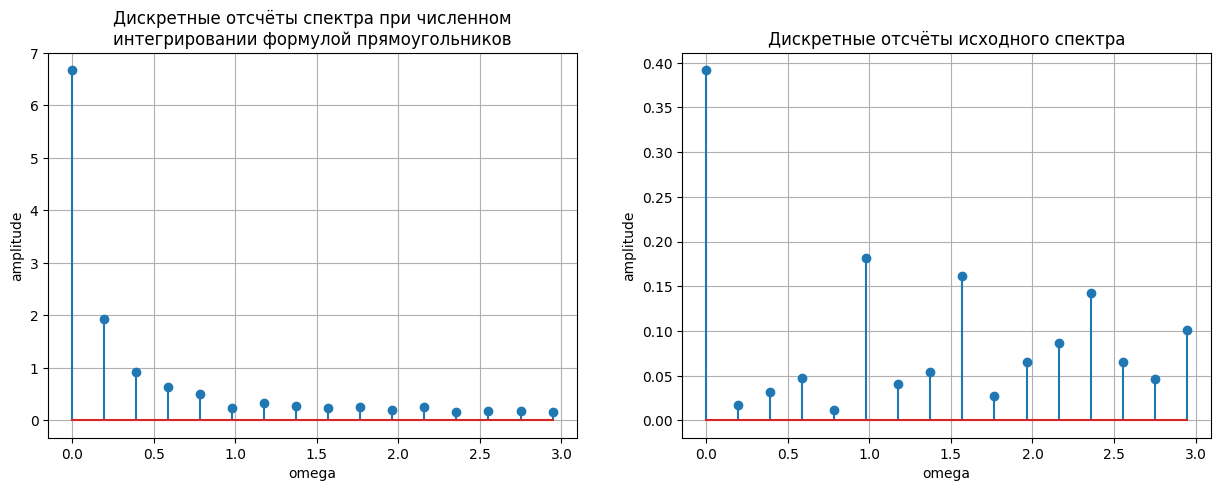

In [17]:
compare_spectrums(rectangle_signal, signal_discrete, 'Дискретные отсчёты спектра при численном\nинтегрировании формулой прямоугольников')

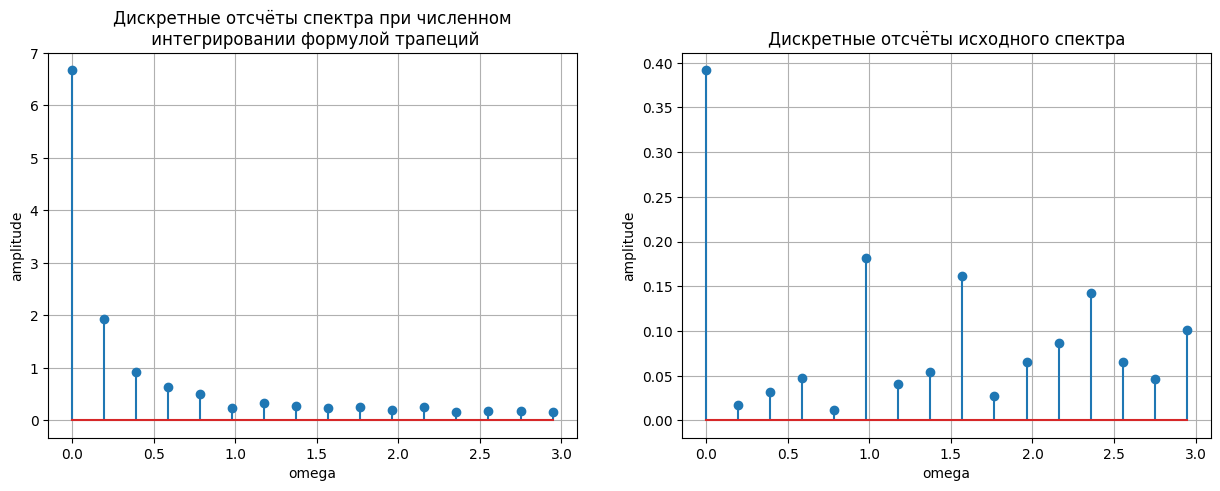

In [18]:
compare_spectrums(rectangle_signal, signal_discrete, 'Дискретные отсчёты спектра при численном\n интегрировании формулой трапеций')

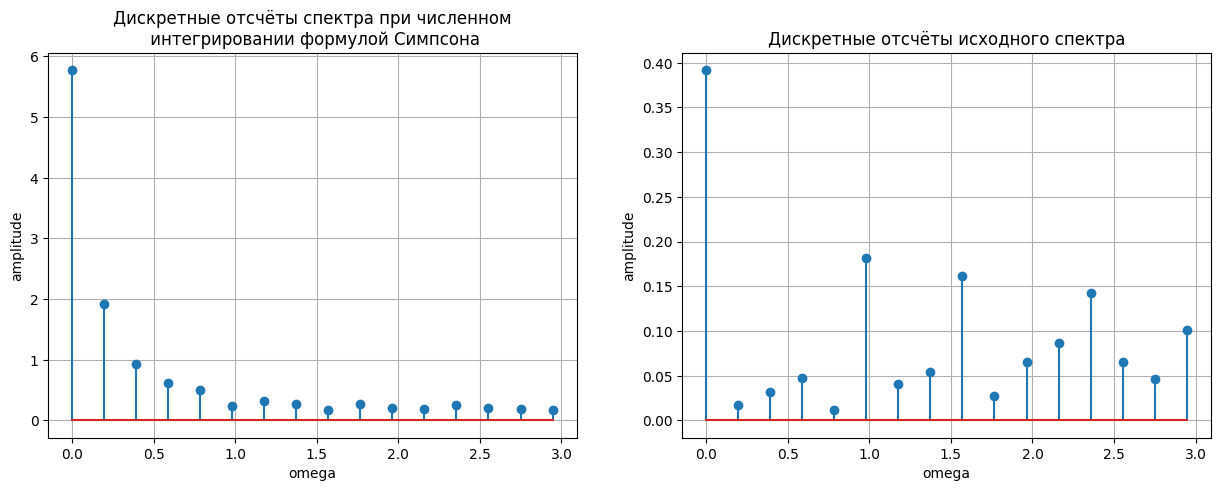

In [25]:
compare_spectrums(simpson_signal, signal_discrete, 'Дискретные отсчёты спектра при численном\n интегрировании формулой Симпсона')

Построим $H(\omega)$ для фильтров, соответствующих численному интегрированию

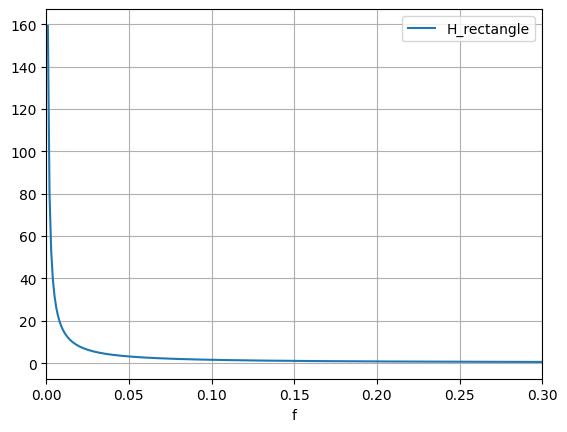

In [20]:
# Построение H(omega)
def H_simpson(omega):
    return (np.cos(omega) + 2) / (3 * 1j * np.sin(omega))
def H_trapezoid(omega):
    return np.cos(omega / 2) / (2 * 1j * np.sin(omega / 2))
def H_rectangle(omega):
    return 1 / (np.cos(omega) + 1j * np.sin(omega) - 1)

def plot_func(func, label=None, stop=0.3):
    frequencies = np.arange(0.001, stop + 0.001, 0.001)
    values = [np.absolute(func(f * 2 * np.pi)) for f in frequencies]
    plt.xlabel("f")
    plt.plot(frequencies, values, label=label)
    plt.legend()
    plt.xlim(0, stop)
    plt.grid()
    
plot_func(H_rectangle, label="H_rectangle")

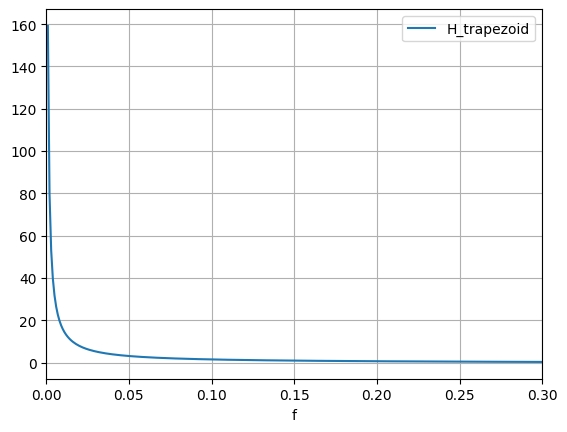

In [21]:
plot_func(H_trapezoid, label="H_trapezoid")

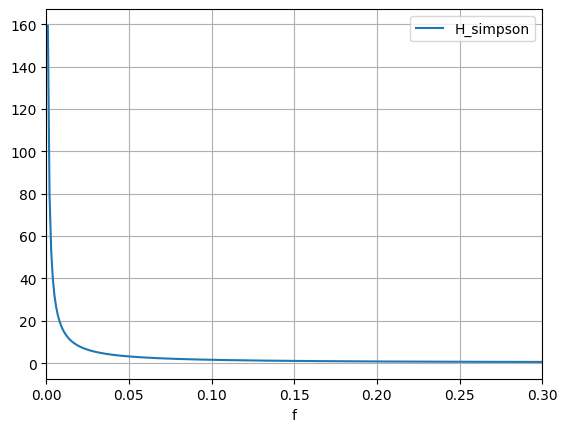

In [22]:
plot_func(H_simpson, label="H_simpson")

Графики передаточных функций соответствуют полученным спектрам. Все формулы численного интегрирования существенно усиливают все частоты, в особенности усиливаются низкие частоты.

### Выводы



В ходе выполнения лабораторной были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).   
В ходе выполнения работы были применены фильтры, основанные на формулах численного дифференцирования и интегрирования. Построены графики передаточных функций и графики спектров дл полученных сигналов. Были сделаны выводы о частотных характеристиках фильтров.